# Práctica 1: Aprendizaje automático

__Fecha de entrega: 13 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [ ]:
RANDOM_STATE = 333

# Apartado 2: Clasificación

__Número de grupo: 19__

__Nombres de los estudiantes: SÁNCHEZ GÓMEZ, ALBERTO y CARPIO CUENCA, SARA__

## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('mobile_phones.csv')
df['price_range'] = df['price_range'].astype('category')
df

FileNotFoundError: ignored

In [ ]:
df.dtypes

battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range      category
dtype: object

## 2) Análisis de los datos

**Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.**

In [ ]:
df.groupby('price_range').count()

battery_power  blue  clock_speed  dual_sim   fc  four_g  \
price_range                                                            
0                      500   500          500       500  500     500   
1                      500   500          500       500  500     500   
2                      500   500          500       500  500     500   
3                      500   500          500       500  500     500   

             int_memory  m_dep  mobile_wt  n_cores   pc  px_height  px_width  \
price_range                                                                    
0                   500    500        500      500  500        500       500   
1                   500    500        500      500  500        500       500   
2                   500    500        500      500  500        500       500   
3                   500    500        500      500  500        500       500   

             ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi  
price_range                                                           
0            500   500   500        500      500           500   500  
1            500   500   500        500      500           500   500  
2            500   500   500        500      500           500   500  
3            500   500   500        500      500           500   500

Como se puede observar, hay 500 individuos de cada una de las cuatro clases, por lo que están equilibradas. Ninguna podría confundirse con un dato anómalo o ruido. De haber alguna clase con mayor o menor representación que el resto, sería muy probable que el proceso de claseificación de nuevos individuos resultase erroneo. Por ejemplo, de tener la siguiente representación

| `price_range` | count |
|--|--|
| 0 | 5 |
| 1 | 665 |
| 2 | 665 |
| 3 | 665 |

los individuos pertenecientes a la clase `price_range` = 0 serían asignados a cualquiera de las otras tres clases.


**Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?**

In [ ]:
df.corrwith(df['price_range']).round(3)

battery_power    0.201
blue             0.021
clock_speed     -0.007
dual_sim         0.017
fc               0.022
four_g           0.015
int_memory       0.044
m_dep            0.001
mobile_wt       -0.030
n_cores          0.004
pc               0.034
px_height        0.149
px_width         0.166
ram              0.917
sc_h             0.023
sc_w             0.039
talk_time        0.022
three_g          0.024
touch_screen    -0.030
wifi             0.019
dtype: float64

Podemos observar que la variable con mayor correlación con `price_range` es `ram`, con una correlación de 0.917, una correlación lineal positiva casi perfecta. Además, aunque con una correlación significativamente menor, está `battery_power`, `px_height` y `px_width`, con una correlación de 0.201, 0.149 y 0.166 respectivamente. La correlación de estas tres ultimas variables es cercana a 0, pero, comparadas con el resto, todavía nos podrían aportar algo de información. El resto de variables presenta correlaciones bastante cercanas a cero, por lo que, probablemente, se podrían suprimir sin mayor repercusión.

In [ ]:
#df.corr().round(1) para visualizar mejor cuáles variables están correlacionadas entre sí
df.corr().round(3)

battery_power   blue  clock_speed  dual_sim     fc  four_g  \
battery_power          1.000  0.011        0.011    -0.042  0.033   0.016   
blue                   0.011  1.000        0.021     0.035  0.004   0.013   
clock_speed            0.011  0.021        1.000    -0.001 -0.000  -0.043   
dual_sim              -0.042  0.035       -0.001     1.000 -0.029   0.003   
fc                     0.033  0.004       -0.000    -0.029  1.000  -0.017   
four_g                 0.016  0.013       -0.043     0.003 -0.017   1.000   
int_memory            -0.004  0.041        0.007    -0.016 -0.029   0.009   
m_dep                  0.034  0.004       -0.014    -0.022 -0.002  -0.002   
mobile_wt              0.002 -0.009        0.012    -0.009  0.024  -0.017   
n_cores               -0.030  0.036       -0.006    -0.025 -0.013  -0.030   
pc                     0.031 -0.010       -0.005    -0.017  0.645  -0.006   
px_height              0.015 -0.007       -0.015    -0.021 -0.010  -0.019   
px_width              -0.008 -0.042       -0.009     0.014 -0.005   0.007   
ram                   -0.001  0.026        0.003     0.041  0.015   0.007   
sc_h                  -0.030 -0.003       -0.029    -0.012 -0.011   0.027   
sc_w                  -0.021  0.001       -0.007    -0.017 -0.012   0.037   
talk_time              0.053  0.014       -0.011    -0.039 -0.007  -0.047   
three_g                0.012 -0.030       -0.046    -0.014  0.002   0.584   
touch_screen          -0.011  0.010        0.020    -0.017 -0.015   0.017   
wifi                  -0.008 -0.022       -0.024     0.023  0.020  -0.018   

               int_memory  m_dep  mobile_wt  n_cores     pc  px_height  \
battery_power      -0.004  0.034      0.002   -0.030  0.031      0.015   
blue                0.041  0.004     -0.009    0.036 -0.010     -0.007   
clock_speed         0.007 -0.014      0.012   -0.006 -0.005     -0.015   
dual_sim           -0.016 -0.022     -0.009   -0.025 -0.017     -0.021   
fc                 -0.029 -0.002      0.024   -0.013  0.645     -0.010   
four_g              0.009 -0.002     -0.017   -0.030 -0.006     -0.019   
int_memory          1.000  0.007     -0.034   -0.028 -0.033      0.010   
m_dep               0.007  1.000      0.022   -0.004  0.026      0.025   
mobile_wt          -0.034  0.022      1.000   -0.019  0.019      0.001   
n_cores            -0.028 -0.004     -0.019    1.000 -0.001     -0.007   
pc                 -0.033  0.026      0.019   -0.001  1.000     -0.018   
px_height           0.010  0.025      0.001   -0.007 -0.018      1.000   
px_width           -0.008  0.024      0.000    0.024  0.004      0.511   
ram                 0.033 -0.009     -0.003    0.005  0.029     -0.020   
sc_h                0.038 -0.025     -0.034   -0.000  0.005      0.060   
sc_w                0.012 -0.018     -0.021    0.026 -0.024      0.043   
talk_time          -0.003  0.017      0.006    0.013  0.015     -0.011   
three_g            -0.009 -0.012      0.002   -0.015 -0.001     -0.031   
touch_screen       -0.027 -0.003     -0.014    0.024 -0.009      0.022   
wifi                0.007 -0.028     -0.000   -0.010  0.005      0.052   

               px_width    ram   sc_h   sc_w  talk_time  three_g  \
battery_power    -0.008 -0.001 -0.030 -0.021      0.053    0.012   
blue             -0.042  0.026 -0.003  0.001      0.014   -0.030   
clock_speed      -0.009  0.003 -0.029 -0.007     -0.011   -0.046   
dual_sim          0.014  0.041 -0.012 -0.017     -0.039   -0.014   
fc               -0.005  0.015 -0.011 -0.012     -0.007    0.002   
four_g            0.007  0.007  0.027  0.037     -0.047    0.584   
int_memory       -0.008  0.033  0.038  0.012     -0.003   -0.009   
m_dep             0.024 -0.009 -0.025 -0.018      0.017   -0.012   
mobile_wt         0.000 -0.003 -0.034 -0.021      0.006    0.002   
n_cores           0.024  0.005 -0.000  0.026      0.013   -0.015   
pc                0.004  0.029  0.005 -0.024      0.015   -0.001   
px_height         0.511 -0

Adicionalmente, al revisar la tabla de correlación de las variables numéricas, observamos cierta correlación entre determinadas variables
|variables|corr entre sí|corr con `price_range`|
|--|--|--|
|`fc`, `pc`|0.645| 0.022, 0.034|
|`four_g`, `three_g`|0.584| 0.015, 0.024|
|`px_height`, `px_width`|0.511|0.149, 0.166|
|`sc_h`, `sc_w`|0.506|0.023, 0.039|

La diferencia en la correlación con la variable objetivo está en el orden de las centésimas por lo que podría ser interesante considerar la eliminación de uno de los miembros de las parejas



**Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`.**

In [ ]:
df[['ram', 'battery_power', 'px_height', 'px_width']].describe().transpose()

count       mean          std    min      25%     50%  \
ram            2000.0  2124.2130  1084.732044  256.0  1207.50  2146.5   
battery_power  2000.0  1238.5185   439.418206  501.0   851.75  1226.0   
px_height      2000.0   645.1080   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.5155   432.199447  500.0   874.75  1247.0   

                   75%     max  
ram            3064.50  3998.0  
battery_power  1615.25  1998.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0

**Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases?**

array([[<AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='battery_power', ylabel='ram'>,
        <AxesSubplot:xlabel='px_height', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>],
       [<AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_height', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>],
       [<AxesSubplot:xlabel='ram', ylabel='px_height'>,
        <AxesSubplot:xlabel='battery_power', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_height', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_height'>],
       [<AxesSubplot:xlabel='ram', ylabel='px_width'>,
        <AxesSubplot:xlabel='battery_power', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_height', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_width'>]], dtype=object)

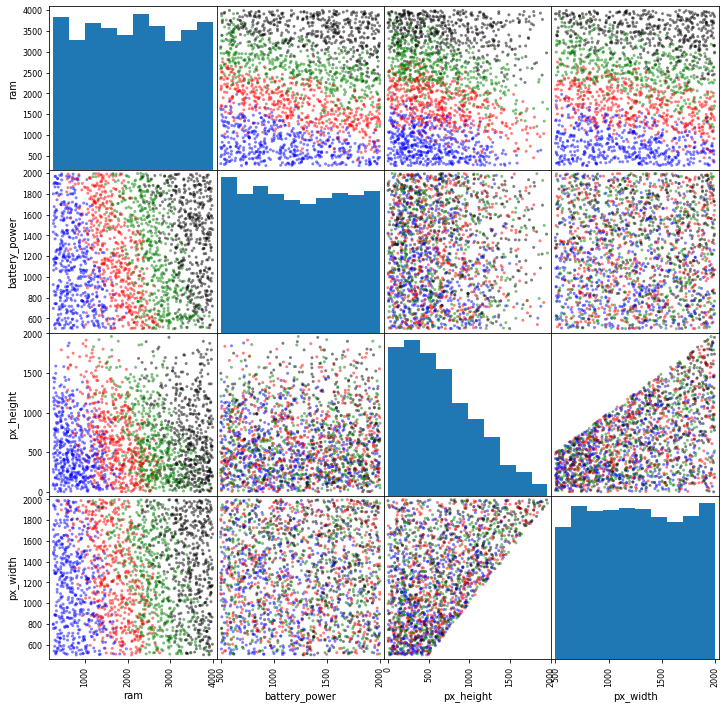

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = { 0: 'blue', 1: 'red', 2: 'green', 3: 'black' }
colors = df['price_range'].map(dic_colors)

scatter_matrix(df[['ram', 'battery_power', 'px_height', 'px_width']], figsize = (12, 12), diagonal = 'hist', color=colors)

In [ ]:
import plotly as py
py.offline.init_notebook_mode() 
import plotly.figure_factory as ff

fig = ff.create_scatterplotmatrix(df[['ram', 'battery_power', 'px_height', 'px_width', 'price_range']], diag='box', index='price_range', height=800, width=800)
py.offline.iplot(fig, filename='Box plots along Diagonal Subplots')

Como se puede observar, cualquier variable combinada con `ram` separará decentemente las clases, dado que `ram` tiene una correlación lineal positiva casi perfecta con `price_range`.

**A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?**

Puesto que el precio de los teléfonos parece depender únicamente de la memoria ram, creo que será un problema sencillo de resolver.

## 3) Normalizar los datos

**Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.**

NameError: ignored

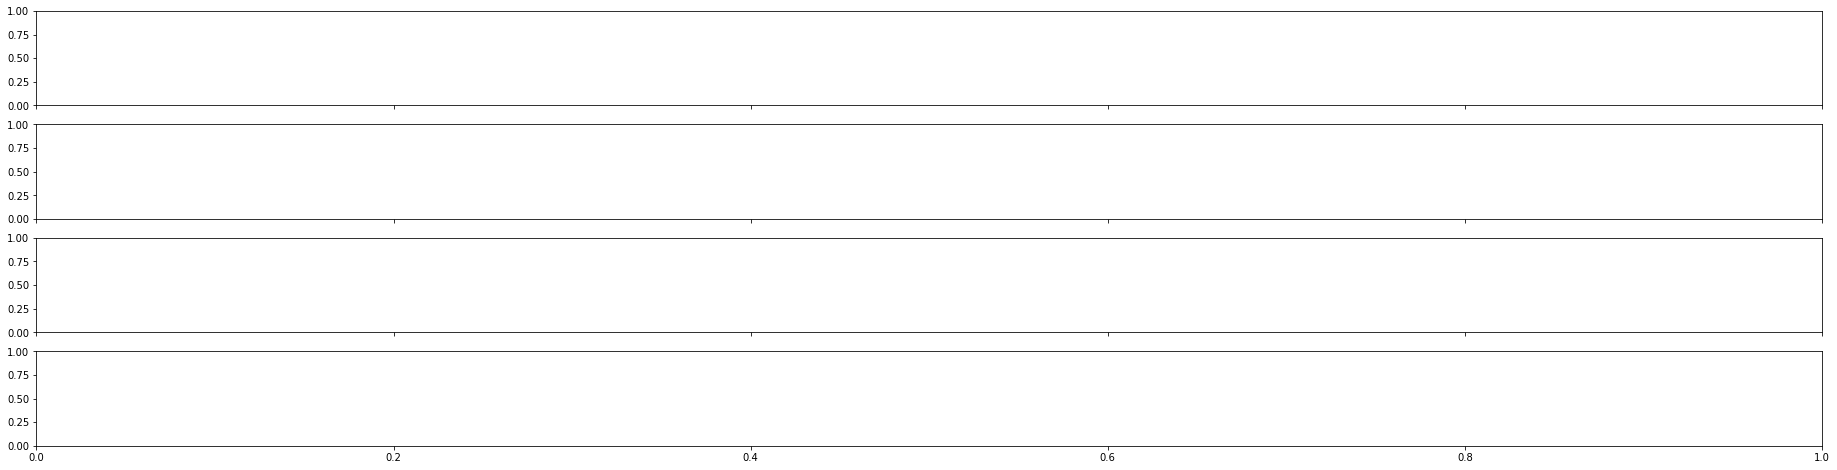

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, figsize=(32, 8), sharex=True)
ax[0].scatter(x = df['ram'], y = df['price_range'])
ax[0].set_xlabel("MB of ram")
ax[0].set_ylabel("Phone price range")

ax[1].scatter(x = df['battery_power'], y = df['price_range'], color='green')
ax[1].set_xlabel("Power of battery mAh")
ax[1].set_ylabel("Phone price range")

ax[2].scatter(x = df['px_height'], y = df['price_range'], color='red')
ax[2].set_xlabel("Pixel resolution height")
ax[2].set_ylabel("Phone price range")

ax[3].scatter(x = df['px_width'], y = df['price_range'], color='purple')
ax[3].set_xlabel("Pixel resolution width")
ax[3].set_ylabel("Phone price range")

plt.show()

Como podemos observar, cada variable tiene su propio rango de valores y en distintas magnitudes, pero como vamos a trabajar con un árbol de decisión, no es necesario reescalar los datos.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [ ]:
train_vars = np.array(df.iloc[:,0:-1])
target_var = np.array(df['price_range'])

In [ ]:
train_accuracy = []
test_accuracy = []

mss_range = range(2, 201)
for mss in mss_range:
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=mss, random_state=RANDOM_STATE)
    clf = clf.fit(train_vars, target_var)
    scores = cross_validate(clf, train_vars, target_var, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))



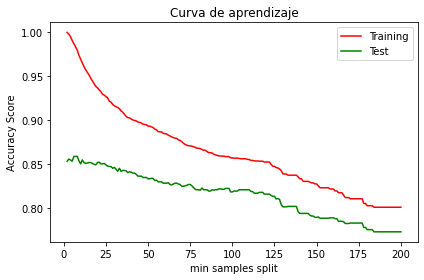

In [ ]:
plt.plot(mss_range, train_accuracy, color="r",  label="Training")
plt.plot(mss_range, test_accuracy, color="g", label="Test")

plt.title("Curva de aprendizaje")
plt.xlabel("min samples split"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
train_accuracy[0], test_accuracy[0], train_accuracy[4], test_accuracy[4], np.array(test_accuracy).argmax() 

(1.0, 0.853, 0.9870555555555555, 0.8584999999999999, 4)

La curva de testeo alcanza su máximo para `min_samples_split = 6`. En ese punto, la curva de entrenamiento desciende de 1 a 0.987, mientras que la curva de testeo sube de 0.853 a 0.858.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
tn = list(set(map(str,df['price_range'].values)))[::-1]

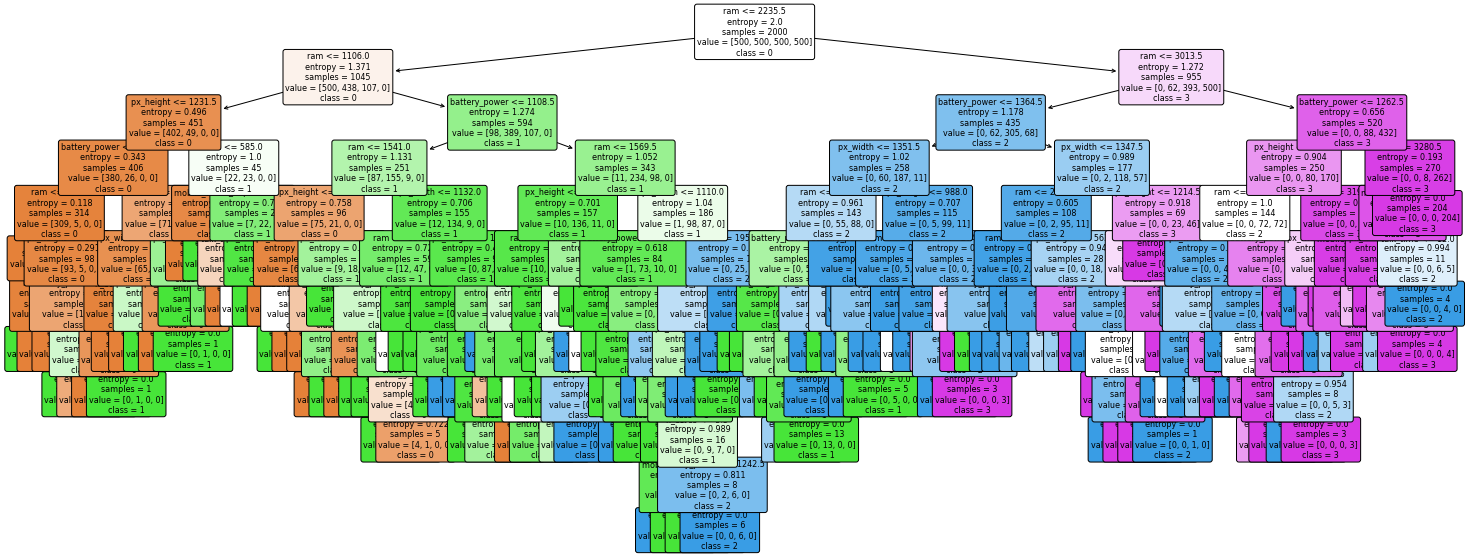

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=6, random_state=RANDOM_STATE)
clf = clf.fit(train_vars, target_var)

plt.figure(figsize=(25,10))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=tn, rounded=True, fontsize=8)
plt.show()

In [ ]:
#result for the complete tree
clf.feature_importances_

array([0.11614256, 0.        , 0.00514092, 0.        , 0.00093138,
       0.        , 0.0068085 , 0.00790934, 0.01452188, 0.00645417,
       0.00527734, 0.06203804, 0.08253337, 0.68405825, 0.        ,
       0.00196254, 0.00538329, 0.0008384 , 0.        , 0.        ])

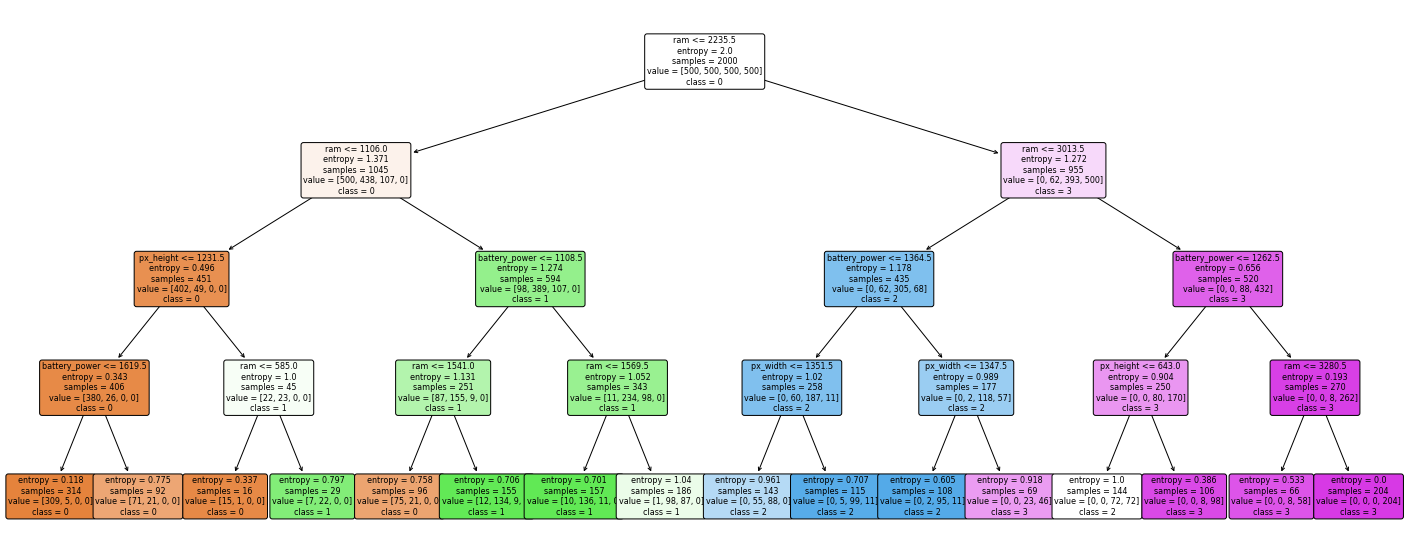

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=6, random_state=RANDOM_STATE)
clf = clf.fit(train_vars, target_var)

plt.figure(figsize=(25,10))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=tn, rounded=True, fontsize=8)
plt.show()

In [ ]:
#result for a tree of depth 4
clf.feature_importances_

array([0.09979998, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02862705, 0.03234296, 0.83923001, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

- Las variables más importantes son `ram`, `battery_power`, `px_height` y `px_width`, como ya habíamos visto anteriormente
  |variable| imporatancia global|importancia md=4|
  |--|--|--|
  |`ram`|0.68405825| 0.83923001|
  |`battery_power`|0.11614256|0.09979998|
  |`px_width`|0.08253337|0.03234296|
  |`px_height`|0.06203804|0.02862705|

- Sí que hay variables que no se han usado, ni en el árbol de profundidad limitada ni en el completo: `blue`, `dual_sim`, `four_g`, `sc_h`, `touch_screen`, `wifi`. Nótese ademas que ya habíamos sugerido anteriormente la eliminación de las variables `four_g` y `sc_h`, al observar sus valores de correlación.

- La primera pregunta es **`ram` <= 2235.5** para la cual, clasifica como pertenecientes a la clase 0 a 1045 individuos [500, 438, 107, 0], y como pertenecientes a la clase 3 a los otros 955 restantes [0, 62, 393, 500]. Es decir, de 2000 individuos, clasifica correctamente la mitad, lo que supone una tasa de acierto del 50%.

  Siguiendo la fórmula $acc = \frac{VP+VN}{VP+VN+FP+FN}$, calculamos los siguientes valores los siguientes valores: VP = 1000, VN = 1000, FP = 1000, FN = 1000.  
  Al sustituir, $\frac{1000+1000}{1000+1000+1000+1000} = 0.5$, obtenemos el mismo valor.



- El árbol es capaz de separar las clases cuando se calcula por completo. Para una profundidad de 4, como la mostrada, vemos que las clases no se terminan se separar correctamente.

- Las clases que se separan mejor son la  0 (low cost) y la 3 (very high cost). Como ya hemos visto, la variable `ram` las separa por completo la una de la otra, quedando las clases 1 (medium cost) y 2 (high cost) por separar.

- En el árbol de profundida 4 observamos que el nodo con mayor confusión es el de color verde, con una entropía de 1.274. Este nodo coincide con el árbol completo.

## 6) Estudiando el error

**Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?**

In [ ]:
train_accuracy = []
test_accuracy = []

max_depths = range(1, 13)
for md in max_depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=6, random_state=RANDOM_STATE)
    clf = clf.fit(train_vars, target_var)
    scores = cross_validate(clf, train_vars, target_var, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.5,
  0.7638333333333334,
  0.7649999999999999,
  0.8155555555555555,
  0.8753333333333334,
  0.913111111111111,
  0.9503333333333334,
  0.9747777777777777,
  0.9838333333333333,
  0.9863333333333333,
  0.9869999999999999,
  0.9870555555555555],
 [0.5,
  0.758,
  0.756,
  0.7830000000000001,
  0.834,
  0.8494999999999999,
  0.851,
  0.8535,
  0.8625,
  0.8554999999999999,
  0.86,
  0.8584999999999999])

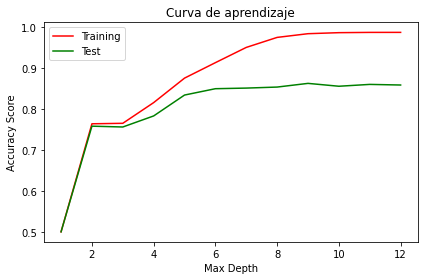

In [ ]:
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

plt.title("Curva de aprendizaje")
plt.xlabel("Max Depth"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [ ]:
ta = np.array(test_accuracy)
ta.max(), ta.argmax() + 1 #Hay que sumar 1 al índice por que el rango es [1, 12]

(0.8625, 9)

A profundidad 9, la curva de testeo alcanza su valor máximo. Para mayores profundidades, la curva de testeo desciende ligeramente, por lo que la profundidad óptima es 9.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

clf = DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_split=6, random_state=RANDOM_STATE)

scores = cross_validate(clf, train_vars, target_var, scoring=scoring_metrics, cv=10, return_train_score= False)

print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8638856435603447
Exhaustividad ponderada media:  0.8625
F1 ponderado media:  0.8625043922449767


**Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_split=6, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, train_vars, target_var, cv=10)

# Informe por clases
cr = classification_report(target_var, predictions, target_names=tn)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       500
           1       0.84      0.84      0.84       500
           2       0.81      0.81      0.81       500
           3       0.89      0.89      0.89       500

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[457  43   0   0]
 [ 42 420  38   0]
 [  0  39 405  56]
 [  0   0  57 443]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

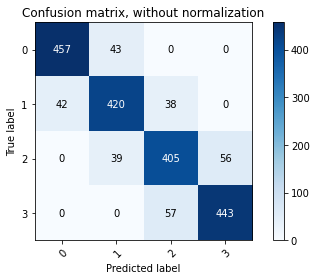

In [ ]:
plot_confusion_matrix(target_var, predictions, tn, normalize=False)

**Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.**

Me parece lo suficientemente fiable como para hacer prácticas como esta, pero no lo presentaría ante una empresa real. El clasificador falla el 10% de las veces, más o menos, lo cual, puede parecer poco, pero es en realidad demasiado como para poder usarse en estudios de mercado reales.  
Sin embargo, usar un clasificador de árbol me parece adecuado en esta ocasión. La base de datos contaba con 20 variables, cada una con sus propias métricas. Pero no hizo falta reescalar los datos. Además, pudimmos observar que de hecho, había varias variables que no necesitabamos en absoluto, haciendo posible la reducción de la base de datos.

Como desventaja, tengo que decir que optimizar las variables del árbol no es tan obvio. En esta ocasión, se ha tratado de optimizar según los valores de la curva de testeo, pero la diferencia entre el valor óptimo y otros valores era tan pequeña que no sé si merece la pena.

## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.
